# Capstone Initial Models - Diaper Manufacturing Problem
## Author - Shanshan Lin

Input datasets:
1. a dataset file SECOM containing 1567 examples, each with 591 features, presented in a 1567 x 591 matrix (secom.data)
2. a labels file listing the classifications and date time stamp for each example (secom_labels.data)

In this notebook, I am primarily interested in seeing what different ki

First, read in the data and process like the way it was processed in milestone 1. The data consists of two parts, secom_labels.data and secom.data:

In [48]:
# first part - secom_labels.data
import pandas as pd
file1 = open('secom_labels.data')
lines = file1.readlines()
file1.close()

# code reference: DATASCI420 Lesson 4 Code Talk - Importing the Dataset
#cols = []
#for line in lines:
    #if "@attribute" in line:
        #tstr=line.split()
        #cols.append(tstr[1])
classifier = pd.DataFrame(lines, columns = {'temp'})
classifier = pd.DataFrame(classifier['temp'].str.split('"',1).tolist(),
                                 columns = ['classifier','timestamp'])
classifier['timestamp'] = classifier['timestamp'].str.replace('"\n', '')
classifier

,classifier,timestamp
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00
...,...,...
1562,-1,16/10/2008 15:13:00
1563,-1,16/10/2008 20:49:00
1564,-1,17/10/2008 05:26:00
1565,-1,17/10/2008 06:01:00


In [49]:
# second - secom.data
from sklearn.impute import KNNImputer
df = pd.read_csv('secom.data', sep = ' ', header = None, na_values='?')
imputer = KNNImputer(n_neighbors=2, weights="uniform")
df = pd.DataFrame(imputer.fit_transform(df))
df

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.00650,97.34530,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.00435,207.40450,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.00470,203.17200,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.00465,43.60775,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.00250,43.52310,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.00750,93.49410,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


Set the column names for data:

In [50]:
cols = pd.DataFrame(list(df.columns), columns = {'id'})
cols['name'] = 'sensor'
cols['id'] = cols['id'].astype(str)
cols['col_names'] = cols['name'] + '_' + cols['id']
cols = list(cols['col_names'])
df.columns = cols
columns = list(df) # set this for decision tree use
df

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_580,sensor_581,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.00650,97.34530,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.00600,208.20450,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.01480,82.86020,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.00440,73.84320,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.00435,207.40450,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.00470,203.17200,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.00465,43.60775,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.00250,43.52310,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.00750,93.49410,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


Merge the two parts together into one:

1. Split prepared data into training and testing:

In [51]:
df['classifier'] = classifier['classifier'].astype(float)
df['timestamp'] = classifier['timestamp']
df

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589,classifier,timestamp
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.01620,...,0.5005,0.0118,0.0035,2.3630,0.0148,0.0119,0.0037,75.0808,-1.0,19/07/2008 11:55:00
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.00050,...,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1.0,19/07/2008 12:32:00
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.00410,...,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1.0,19/07/2008 13:17:00
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.01240,...,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1.0,19/07/2008 14:43:00
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.00310,...,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1.0,19/07/2008 15:22:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.00450,...,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1.0,16/10/2008 15:13:00
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.00610,...,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1.0,16/10/2008 20:49:00
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,1.4765,-0.01355,...,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1.0,17/10/2008 05:26:00
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.00720,...,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1.0,17/10/2008 06:01:00


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# set the target variable
target = df['classifier']

# keep only the numeric variables for training purposes
non_num_cols = ['timestamp', 'classifier']
test_df = df.drop(non_num_cols, axis = 1)

# run the train test split function
x_train, x_test, y_train, y_test = train_test_split(test_df, target, test_size=0.6, random_state=0)
x_train

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_580,sensor_581,sensor_582,sensor_583,sensor_584,sensor_585,sensor_586,sensor_587,sensor_588,sensor_589
616,3020.40,2690.55,2171.8556,940.9917,1.2906,100.0,103.4733,0.1234,1.5227,0.0088,...,0.00625,87.45755,0.4977,0.0136,0.0032,2.7372,0.0192,0.0077,0.0021,40.2536
12,2920.07,2507.40,2195.1222,1046.1468,1.3204,100.0,103.3400,0.1223,1.5310,-0.0259,...,0.00340,52.20390,0.4950,0.0153,0.0041,3.0926,0.0188,0.0098,0.0034,52.2039
522,2960.22,2502.25,2183.3111,1588.5090,1.6269,100.0,102.8467,0.1248,1.5700,0.0178,...,0.00535,64.87475,0.4994,0.0107,0.0029,2.1456,0.0331,0.0210,0.0060,63.2615
1180,3093.46,2479.17,2221.3667,2490.6947,1.2667,100.0,88.6578,0.1220,1.3537,0.0134,...,0.00390,62.33645,0.5006,0.0148,0.0036,2.9659,0.0190,0.0150,0.0045,78.6525
68,3066.19,2702.64,2246.4889,1006.9548,1.0997,100.0,103.3222,0.1184,1.4440,0.0007,...,0.00400,121.54760,0.5001,0.0144,0.0031,2.8813,0.0110,0.0134,0.0040,121.5476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,3032.26,2455.05,2145.4555,1017.0577,1.4534,100.0,103.7878,0.1229,1.3602,-0.0153,...,0.00555,56.86365,0.4973,0.0194,0.0048,3.9109,0.0169,0.0276,0.0081,163.9998
835,3003.72,2537.66,2210.7778,2008.9216,1.1351,100.0,91.1078,0.1240,1.3940,-0.0073,...,0.00380,114.28780,0.5033,0.0154,0.0043,3.0647,0.0099,0.0113,0.0038,114.2878
1216,3031.85,2439.42,2172.8111,969.3436,1.2736,100.0,102.7367,0.1243,1.4711,0.0033,...,0.00120,15.34440,0.5009,0.0167,0.0041,3.3339,0.0293,0.0045,0.0012,15.3444
559,3072.99,2471.62,2126.6555,1015.0770,1.4381,100.0,102.4733,0.1255,1.5006,-0.0321,...,0.00420,44.24730,0.5050,0.0174,0.0042,3.4384,0.0335,0.0122,0.0040,36.2970


2. Build a decision tree model:

In [53]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score

# get a seed
np.random.seed(101)

# entropy
model_ent = DecisionTreeClassifier(criterion='entropy').fit(x_train, y_train) 
y_ent_pred = model_ent.predict(x_test)

# gini
model_gini = DecisionTreeClassifier(min_samples_leaf=4).fit(x_train, y_train)
y_gini_pred = model_gini.predict(x_test)

# Generate an accuracy Score
from sklearn.metrics import accuracy_score

print("Entropy accuracy is : {}%".format(accuracy_score(y_test, y_ent_pred)*100))
print("Gini accuracy is : {}%".format(accuracy_score(y_test, y_gini_pred)*100))


Entropy accuracy is : 84.59086078639744%
Gini accuracy is : 87.56641870350691%


Visualize the decision trees:

[Text(590.1923076923077, 1019.25, 'sensor_59 <= 3.114\nentropy = 0.361\nsamples = 626\nvalue = [583, 43]\nclass = sensor_0'),
 Text(268.2692307692308, 883.35, 'sensor_55 <= 2834.5\nentropy = 0.227\nsamples = 437\nvalue = [421, 16]\nclass = sensor_0'),
 Text(107.3076923076923, 747.45, 'sensor_168 <= 0.109\nentropy = 0.544\nsamples = 88\nvalue = [77, 11]\nclass = sensor_0'),
 Text(53.65384615384615, 611.55, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]\nclass = sensor_0'),
 Text(160.96153846153845, 611.55, 'sensor_90 <= 8952.0\nentropy = 0.849\nsamples = 40\nvalue = [29, 11]\nclass = sensor_0'),
 Text(107.3076923076923, 475.65, 'sensor_139 <= 285.678\nentropy = 0.964\nsamples = 18\nvalue = [7, 11]\nclass = sensor_1'),
 Text(53.65384615384615, 339.75, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = sensor_0'),
 Text(160.96153846153845, 339.75, 'sensor_384 <= 0.819\nentropy = 0.619\nsamples = 13\nvalue = [2, 11]\nclass = sensor_1'),
 Text(107.3076923076923, 203.85000000000002, 'entrop

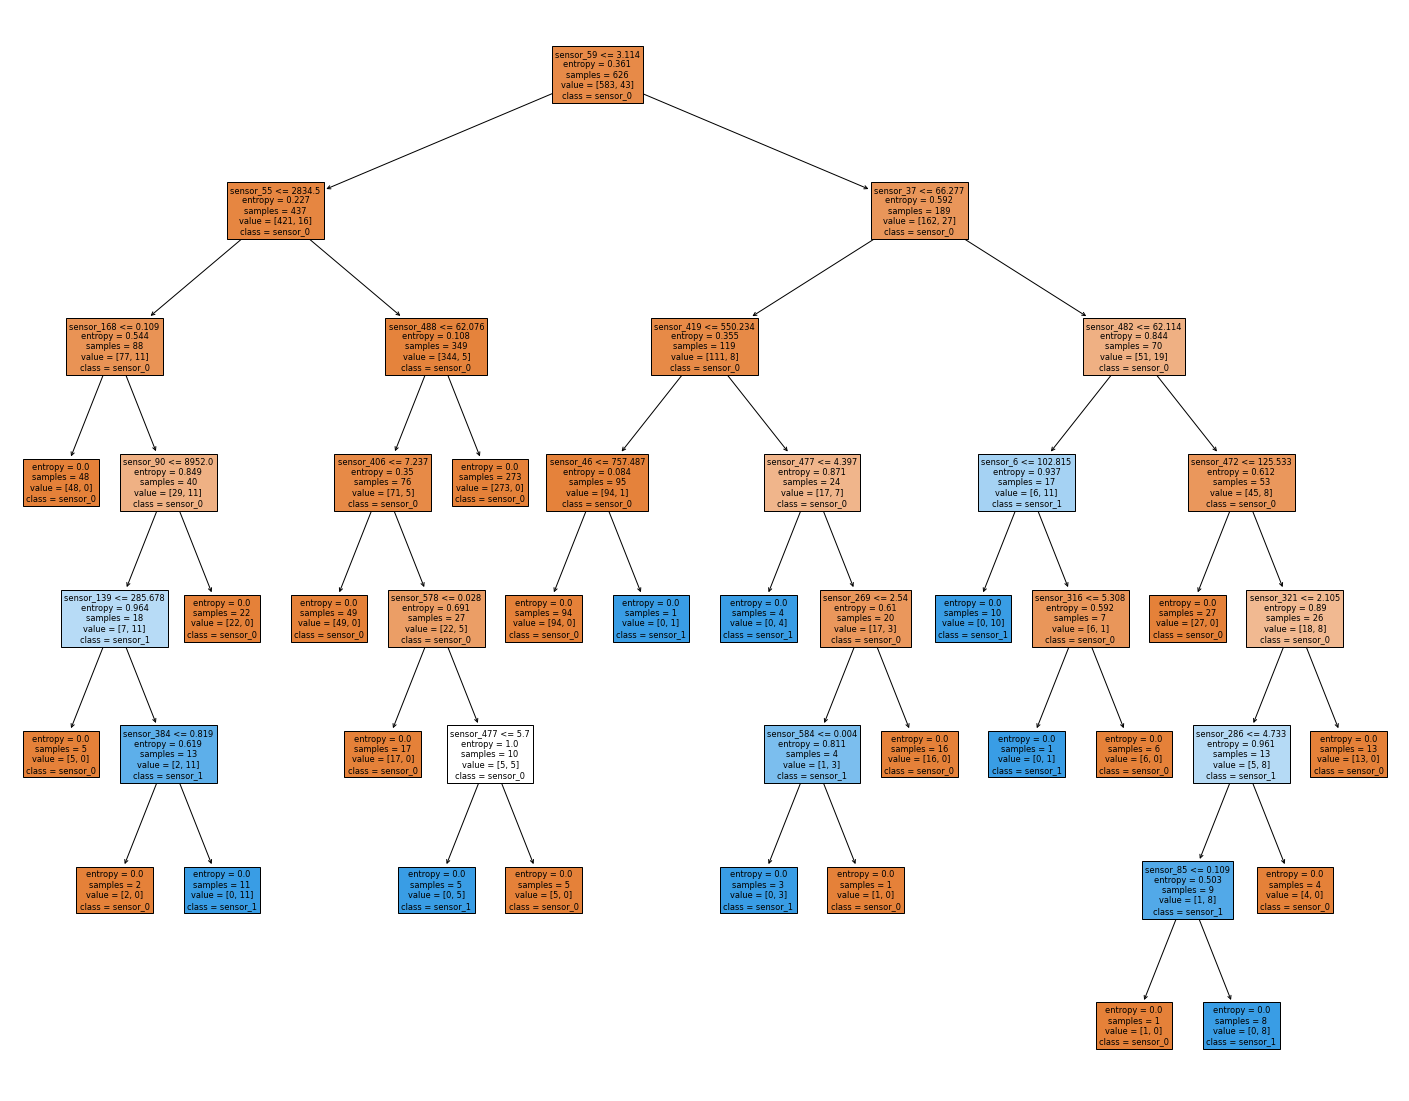

In [54]:
#create a visualization of the tree 
from sklearn import tree
import matplotlib.pyplot as plt

columns = list(x_train) 

# visualize the entropy model
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(model_ent,
                   feature_names=columns,  
                   class_names=columns,
                    filled = True)

[Text(1081.125, 1041.9, 'sensor_64 <= 33.658\ngini = 0.128\nsamples = 626\nvalue = [583, 43]\nclass = sensor_0'),
 Text(878.8499999999999, 951.3000000000001, 'sensor_59 <= 7.934\ngini = 0.114\nsamples = 611\nvalue = [574, 37]\nclass = sensor_0'),
 Text(641.6999999999999, 860.7, 'sensor_348 <= 0.044\ngini = 0.077\nsamples = 521\nvalue = [500, 21]\nclass = sensor_0'),
 Text(502.2, 770.1, 'sensor_582 <= 0.507\ngini = 0.064\nsamples = 510\nvalue = [493, 17]\nclass = sensor_0'),
 Text(390.59999999999997, 679.5, 'sensor_138 <= 96.2\ngini = 0.054\nsamples = 502\nvalue = [488, 14]\nclass = sensor_0'),
 Text(334.79999999999995, 588.9, 'sensor_500 <= 951.218\ngini = 0.047\nsamples = 498\nvalue = [486, 12]\nclass = sensor_0'),
 Text(279.0, 498.29999999999995, 'sensor_26 <= 2.038\ngini = 0.04\nsamples = 493\nvalue = [483, 10]\nclass = sensor_0'),
 Text(223.2, 407.69999999999993, 'sensor_77 <= 0.073\ngini = 0.032\nsamples = 488\nvalue = [480, 8]\nclass = sensor_0'),
 Text(167.39999999999998, 317.1,

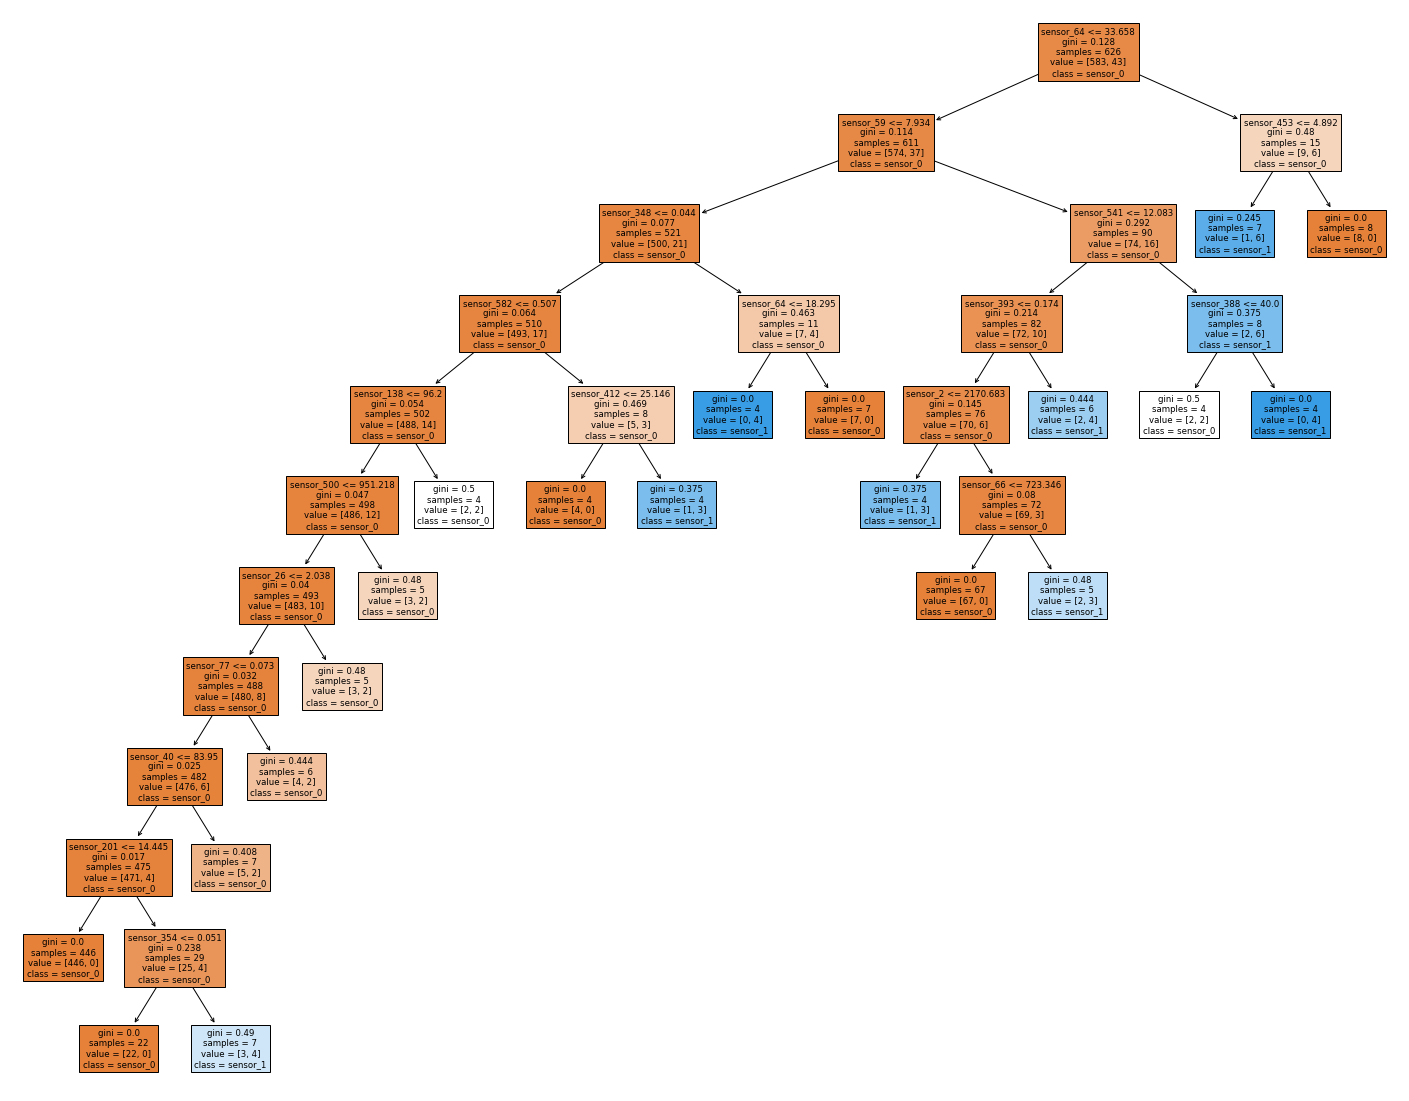

In [55]:
fig = plt.figure(figsize=(25,20)) 
tree.plot_tree(model_gini,
                   feature_names=columns,  
                   class_names=columns,
                   filled=True)

3. build an ensemble model - there are two types of major ensemble models, one being random forest and another being gradient boosted decision trees. In this assignment, I am going to build both models to examine which one works better for the data.

In [56]:
# random forest first
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=nTrees, max_depth=max_depth, random_state=0, verbose=verbose, min_samples_leaf=min_node_size)
clf.fit(x_train, y_train)

Y_test_hat = clf.predict(x_test)
Accuracy = [1 for i in range(len(Y_test_hat)) if y_test.iloc[i] == Y_test_hat[i]]
Accuracy = round(float(np.sum(Accuracy))/len(Y_test_hat)*100,2)
print("Accuracy on Testing Data = %.2f%%"%Accuracy)

Accuracy on Testing Data = 93.52%


In [57]:
# gradient boosted model next
nTrees = 100
max_depth = 5
min_node_size = 5
verbose = 0
learning_rate = 0.05

from sklearn.ensemble import GradientBoostingClassifier
gbm_clf = GradientBoostingClassifier(n_estimators=nTrees, loss='deviance', learning_rate=learning_rate, max_depth=max_depth, \
                                    min_samples_leaf=min_node_size)
gbm_clf.fit(x_train, y_train)


import numpy as np
Y_test_hat = gbm_clf.predict(x_test)
Accuracy = [1 for i in range(len(Y_test_hat)) if y_test.iloc[i] == Y_test_hat[i]]
Accuracy = round(float(np.sum(Accuracy))/len(Y_test_hat)*100,2)
print("Accuracy on Testing Data = %.2f%%"%Accuracy)

Accuracy on Testing Data = 93.41%


4. build an SVM model. First, calculate the best hyperparameters using GridSearchCV:

In [66]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import numpy as np

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression(max_iter = 5000)
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(x_test, y_test)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.4393970560760795}
Best score is 0.9351851851851851


Normalize the data to avoid converge issues while building models:

In [59]:
from sklearn import preprocessing

def norm(df):
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(df)
    df = pd.DataFrame(x_scaled)
    x = df.values #returns a numpy array
    return x

x_train = norm(x_train)
#y_train = norm(y_train)
x_test = norm(x_test)
#y_test = norm(y_test)

First, calculating linear SVC:

In [67]:
# use the parameters from above
cost = logreg_cv.best_params_['C'] # penalty parameter of the error term
gamma = logreg_cv.best_score_ # defines the influence of input vectors on the margins

from sklearn import svm, metrics
from sklearn.metrics import classification_report

# Test a LinearSVC
clf1 = svm.LinearSVC(C=cost, max_iter = 100000).fit(x_train, y_train)
clf1.predict(x_test)
print("LinearSVC")
print(classification_report(clf1.predict(x_test), y_test))

LinearSVC
              precision    recall  f1-score   support

        -1.0       0.99      0.94      0.96       935
         1.0       0.02      0.17      0.03         6

    accuracy                           0.93       941
   macro avg       0.51      0.55      0.50       941
weighted avg       0.99      0.93      0.96       941



Next, test the other kernels to pick one that works the best. Stealing the foor loop from the lab because it's very smart and helpful:

In [76]:
# Test linear, rbf and poly kernels
for k in ('linear', 'rbf', 'poly'):
    print(classification_report(clf.predict(x_test), y_test))
    clf = svm.SVC(gamma=gamma, kernel=k, C=cost).fit(x_train, y_train)
    clf.predict(x_test)
    print(k)

              precision    recall  f1-score   support

        -1.0       0.99      0.94      0.96       930
         1.0       0.05      0.27      0.08        11

    accuracy                           0.93       941
   macro avg       0.52      0.61      0.52       941
weighted avg       0.98      0.93      0.95       941

linear
              precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97       941
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94       941
   macro avg       0.50      0.47      0.48       941
weighted avg       1.00      0.94      0.97       941



c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

rbf
              precision    recall  f1-score   support

        -1.0       1.00      0.94      0.97       941
         1.0       0.00      0.00      0.00         0

    accuracy                           0.94       941
   macro avg       0.50      0.47      0.48       941
weighted avg       1.00      0.94      0.97       941

poly


c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\shanshan lin\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

5. Evaluate all models:
    a. Decision tree model - as expected from the nature of this dataset, the decision trees performed the classification process based on values of certain sensors. The two decision tree models did not pick many common variables - one sensor that was picked by both models is sensor_59. In the mean time, the Gini model seems to have 3% higher accuracy score, and thus is more representative for the model.
    Constructing confusion matrices for both models for a better look at accuracies:

In [80]:
from sklearn.metrics import confusion_matrix
x = pd.DataFrame(
    confusion_matrix(y_test, y_gini_pred),
    columns=['Predicted 1', 'Predicted -1'],
    index=['True 1', 'True -1']
)

x

,Predicted 1,Predicted -1
True 1,813,67
True -1,50,11


In [79]:
print("Precision Score for Gini is : {}%".format(float(x['Predicted 1'][0])/sum(x['Predicted 1'])))
print("Recall Score for Gini is : {}%".format(float(x['Predicted 1'][0])/sum(x.iloc[0])))

Precision Score for Gini is : 0.9420625724217845%
Recall Score for Gini is : 0.9238636363636363%


In [82]:
from sklearn.metrics import confusion_matrix
x = pd.DataFrame(
    confusion_matrix(y_test, y_ent_pred),
    columns=['Predicted 1', 'Predicted -1'],
    index=['True 1', 'True -1']
)

x

,Predicted 1,Predicted -1
True 1,789,91
True -1,54,7


In [83]:
print("Precision Score for Entropy is : {}%".format(float(x['Predicted 1'][0])/sum(x['Predicted 1'])))
print("Recall Score for Entropy is : {}%".format(float(x['Predicted 1'][0])/sum(x.iloc[0])))

Precision Score for Entropy is : 0.9359430604982206%
Recall Score for Entropy is : 0.8965909090909091%


The confusion matrices tell the same story, that Gini model performs better on this dataset.

b. The Random Forest Approach is better than the gradient boosted model for this dataset.

c. For the SVC models, it appears that the rbf is relatively the best here - with the weighted average precision being 1.00, recall = 0.94 and f-score being 0.97.


6. Solicit feedbacks:
Thanks for taking the time to read through my work and thank you in advance for the feedbacks!
    a. While running SVC for linear, rbf and poly models, I got this error:
    'UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.'
    I searched online and it says the cause of that could be that TP + FP = 0 in the case of this dataset. I can't seem to be able to find the root cause for that and how to resolve that issue - the f-score does not appear to be 0 in this case too. Do you have any suggestions regarding this?
    b. Is there any thing else other than the accuracy score that needs to be taken into consideration while comparing the Random Forest model vs. Gradient boosted model?
 